# <center><u><font color='red'> Prédiction des émissions  de CO2</font></u></center>

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge,Lasso,ElasticNet,LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from functions import utils
import math
from sklearn.svm import SVR
from xgboost import XGBRegressor 
from functions.functions import *
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
pd.options.display.float_format = '{:,.4f}'.format


In [48]:
target_col='TotalGHGEmissions'
stratify_col='PrimaryPropertyType'

In [49]:
df=pd.read_csv('data/cleaned_and_normalized_pca.csv')


In [50]:
df.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_43,pca_44,pca_45,pca_46,pca_47,pca_48,pca_49,PrimaryPropertyType,TotalGHGEmissions,SiteEnergyUse(kBtu)
0,0.2698,-0.4683,-1.0268,-1.5179,-0.8687,0.8241,-0.4179,0.4523,0.3812,-0.0616,...,-0.0060,-0.0090,-0.0175,0.0194,0.0048,-0.0191,-0.0075,Hotel,249.9800,"7,226,362.5000"
1,0.1120,-0.0092,-2.0328,0.0130,-1.0090,0.4773,-0.5255,0.7194,0.5387,-0.0590,...,-0.0062,-0.0154,-0.0110,0.0189,0.0041,-0.0162,-0.0040,Hotel,295.8600,"8,387,933.0000"
2,6.1147,-3.1739,-5.8743,0.1846,-5.7726,5.4456,-2.5186,3.7719,2.7266,-0.2225,...,-0.0650,-0.1046,-0.1515,0.1824,0.0196,-0.1631,-0.0461,Hotel,"2,089.2800","72,587,024.0000"
3,-0.0829,-0.0791,-1.2278,-1.4600,-0.8222,0.6423,-0.2737,0.3354,0.2820,-0.0396,...,-0.0034,-0.0049,-0.0112,0.0123,0.0042,-0.0124,-0.0056,Hotel,286.4300,"6,794,584.0000"
4,0.8852,-0.6083,-2.9170,-0.1295,-0.9615,0.6640,-0.4658,0.8654,0.6122,-0.0564,...,-0.0078,-0.0197,-0.0205,0.0268,0.0067,-0.0246,-0.0071,Hotel,505.0100,"14,172,606.0000"


In [51]:
cols=['best_params','R2','rmse','model','time_elapsed']
df_result=pd.DataFrame(columns=cols)
df_result_with_energy_star_score=pd.DataFrame(columns=cols)

In [52]:
test_size=0.25
random_state=42
cv=5
scoring='r2'
feature_cols=[col for col in df.columns.tolist() if col not in ['TotalGHGEmissions','SiteEnergyUse(kBtu)','ENERGYSTARScore',stratify_col]]

 
feature_cols_with_energy_star_score=[col for col in df.columns.tolist() if col not in ['TotalGHGEmissions','SiteEnergyUse(kBtu)','ENERGYSTARScore',stratify_col]]



In [53]:
stratify=df[[stratify_col]]
X_train,X_test,y_train,y_test=train_test_split(df[feature_cols],df[target_col],test_size=test_size,random_state=random_state)
X_train_with_energy_star_score=X_train[feature_cols_with_energy_star_score]
X_test_with_energy_star_score=X_test[feature_cols_with_energy_star_score]
train_y=y_train.values
test_y=y_test.values


## Partie 1 modèles linéaires

### 1 <u>Modèle linéaire simple</u>

#### 1-1 <u>Régression linéaire sans ENERGYSTARScore </u>

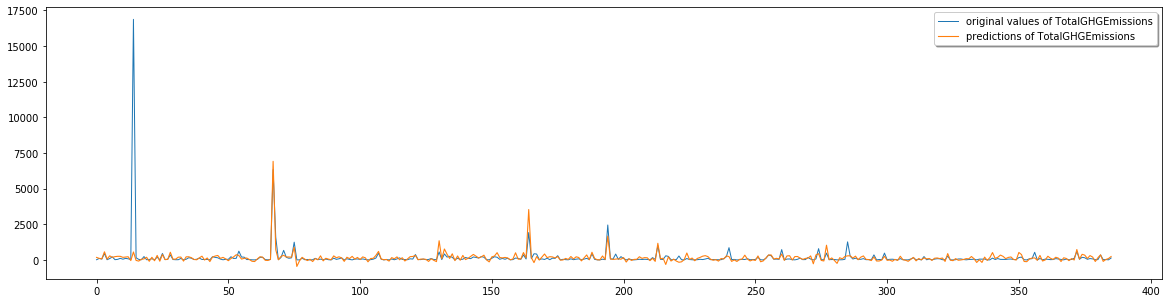

,best_params,R2,rmse,model,time_elapsed
0,None,0.1728,851.9325,LinearRegression,0.0044


In [54]:

train_x=X_train.values
test_x=X_test.values
 

result=utils.model_func(df,LinearRegression(),target_col,feature_cols,test_size,random_state,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
df_result

#### 1-2  <u>Régression linéaire avec ENERGYSTARScore </u>

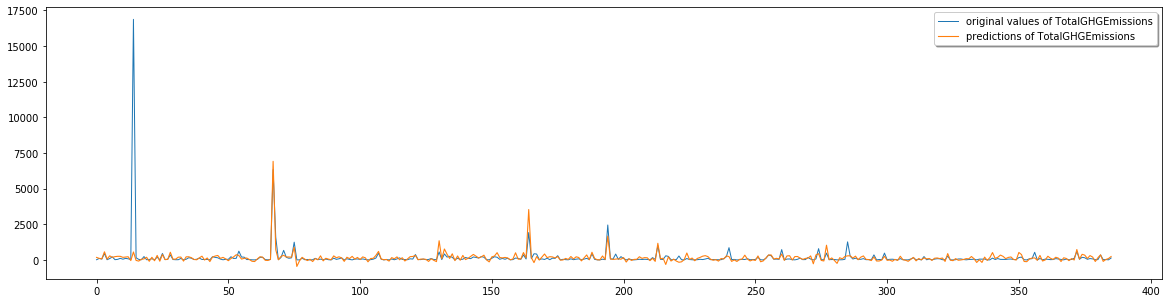

{'best_params': None, 'R2': 0.17279230834673642, 'rmse': 851.9325172262505, 'model': 'LinearRegression', 'time_elapsed': 0.0036551929952111095}


In [55]:

train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values
 
result=utils.model_func(df,LinearRegression(),target_col,feature_cols_with_energy_star_score,test_size,random_state,train_x,test_x,train_y,test_y)

df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
df_result_with_energy_star_score
print(result)

### 2 <u>Régression de ridge</u>

#### 2-1 <u>Régression de ridge sans ENERGYSTARScore </u>

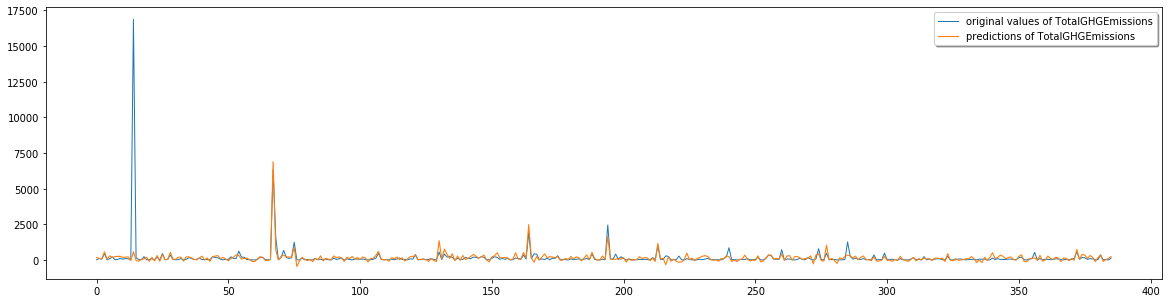

{'best_params': {'alpha': 2, 'fit_intercept': True, 'solver': 'saga'}, 'R2': 0.5355268877817536, 'rmse': 847.0749681905231, 'model': 'Ridge', 'time_elapsed': 7.432391169975745}


In [56]:

train_x=X_train_with_energy_star_score.values
test_x=X_test.values
 
param_grid = [{
    #'alpha':np.arange(0.01,2.01,0.01), 1.9200000000000002
    'alpha':[0,1,1.92,2],
    'fit_intercept':[True,False],
  
  'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}]



scoring = 'r2'
 
model = Ridge(random_state=random_state)
#ridge.best_params_,ridge.best_score_,rmse,model.__class__.__name__,elapsed
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
print(result)

#### 2-2 <u>Régression de ridge avec ENERGYSTARScore </u>

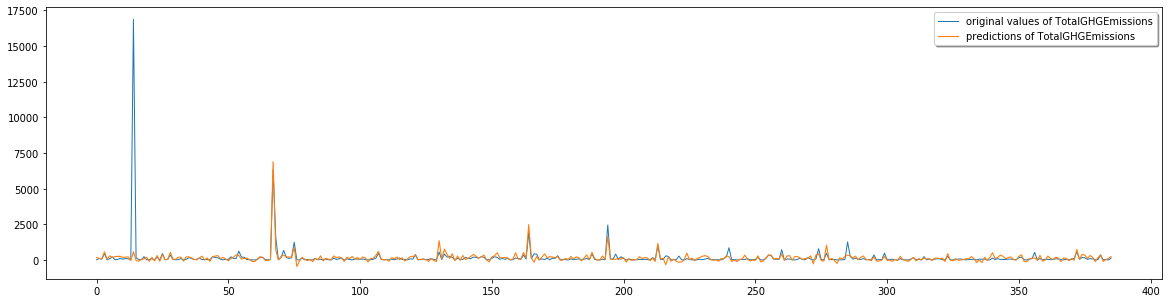

{'best_params': {'alpha': 2, 'fit_intercept': True, 'solver': 'saga'}, 'R2': 0.5355268877817536, 'rmse': 847.0749681905231, 'model': 'Ridge', 'time_elapsed': 7.307864033005899}


,best_params,R2,rmse,model,time_elapsed
0,None,0.1728,851.9325,LinearRegression,0.0037
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.5355,847.0750,Ridge,7.3079


In [57]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values

 
param_grid = [{
    #'alpha':np.arange(0.01,2.01,0.01), 1.9200000000000002
    'alpha':[0,1,1.92,2],
    'fit_intercept':[True,False],
  
  'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}]


 
model = Ridge(random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
print(result)
df_result_with_energy_star_score

### 3 <u>Régression de Lasso</u>

#### 3-1 <u>Régression de Lasso sans ENERGYSTARScore </u>

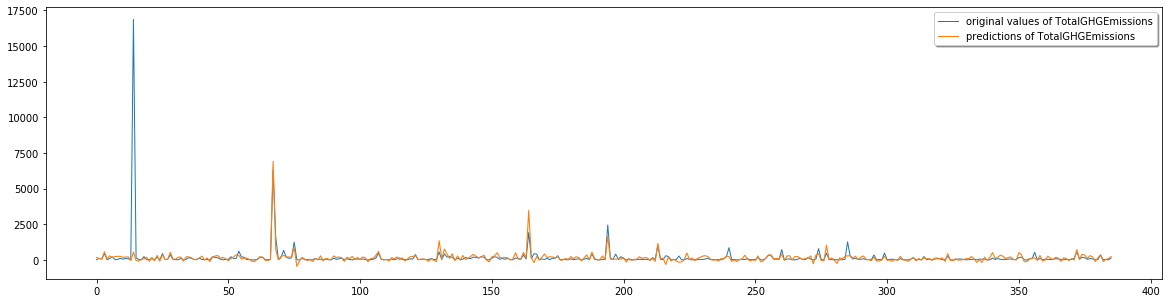

{'best_params': {'alpha': 0.105, 'fit_intercept': True}, 'R2': 0.2721489000487979, 'rmse': 851.5670009308518, 'model': 'Lasso', 'time_elapsed': 0.08053644499159418}


,best_params,R2,rmse,model,time_elapsed
0,None,0.1728,851.9325,LinearRegression,0.0044
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.5355,847.0750,Ridge,7.4324
2,"{'alpha': 0.105, 'fit_intercept': True}",0.2721,851.5670,Lasso,0.0805


In [58]:
train_x=X_train.values
test_x=X_test.values

 
param_grid = [{
   # 'alpha':np.arange(0,0.99,0.001),
     'alpha':[0.105],
    'fit_intercept':[True,False],
  
  
}]


 
 
model = Lasso( random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
print(result)
df_result

#### 3-2 <u>Régression de Lasso avec ENERGYSTARScore </u>

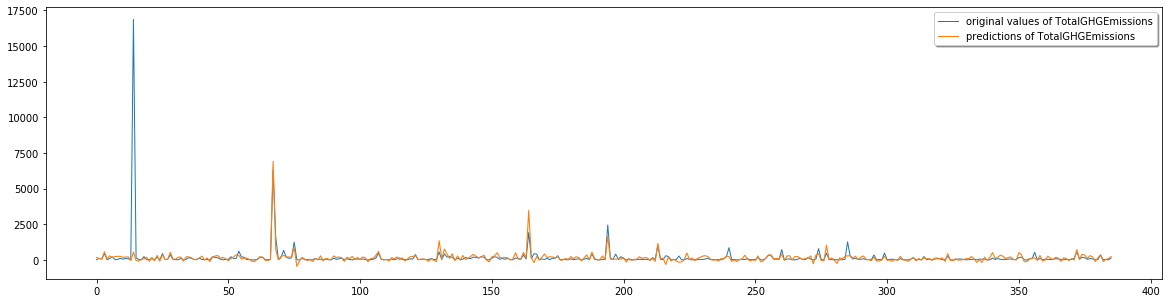

{'best_params': {'alpha': 0.105, 'fit_intercept': True}, 'R2': 0.2721489000487979, 'rmse': 851.5670009308518, 'model': 'Lasso', 'time_elapsed': 0.07292650401359424}


,best_params,R2,rmse,model,time_elapsed
0,None,0.1728,851.9325,LinearRegression,0.0037
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.5355,847.0750,Ridge,7.3079
2,"{'alpha': 0.105, 'fit_intercept': True}",0.2721,851.5670,Lasso,0.0729


In [59]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values

 
param_grid = [{
   # 'alpha':np.arange(0,0.99,0.001),
     'alpha':[0.105],
    'fit_intercept':[True,False],
  
  
}]

 
model = Lasso( random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
print(result)
df_result_with_energy_star_score

### 4 <u>Régression de ElasticNet</u>

#### 4-1 <u>Régression de ElasticNet sans ENERGYSTARScore </u>

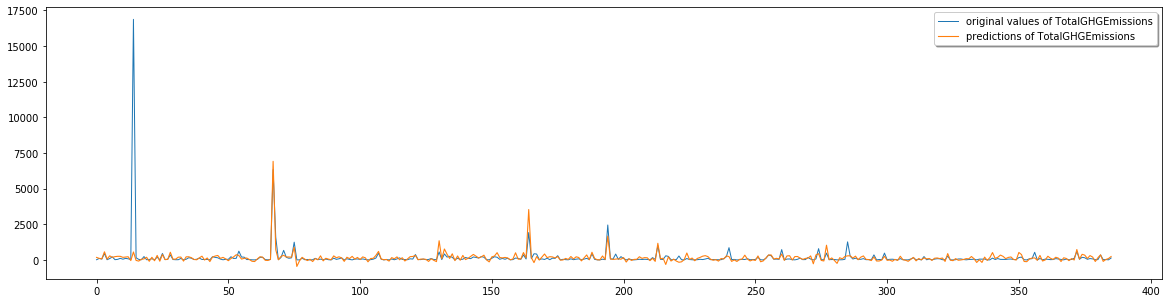

{'best_params': {'alpha': 0, 'l1_ratio': 0}, 'R2': 0.24053242642862518, 'rmse': 851.9325172262505, 'model': 'ElasticNet', 'time_elapsed': 0.20540961000369862}


,best_params,R2,rmse,model,time_elapsed
0,None,0.1728,851.9325,LinearRegression,0.0044
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.5355,847.0750,Ridge,7.4324
2,"{'alpha': 0.105, 'fit_intercept': True}",0.2721,851.5670,Lasso,0.0805
3,"{'alpha': 0, 'l1_ratio': 0}",0.2405,851.9325,ElasticNet,0.2054


In [60]:
train_x=X_train.values
test_x=X_test.values
 
param_grid = [{"alpha": [0],#np.arange(0,2,1),  #coefficient qui multiplie le terme de pénalité
              "l1_ratio": [0],#np.arange(0, 1, 0.01)#L1 ratio si = 1 équivaut à un Lasso si 0 à un Ridge
}]

 
model = ElasticNet( random_state=random_state,normalize=False)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result=df_result.append(result,ignore_index = True)
print(result)
df_result

#### 4-2 <u>Régression de ElasticNet avec ENERGYSTARScore </u>

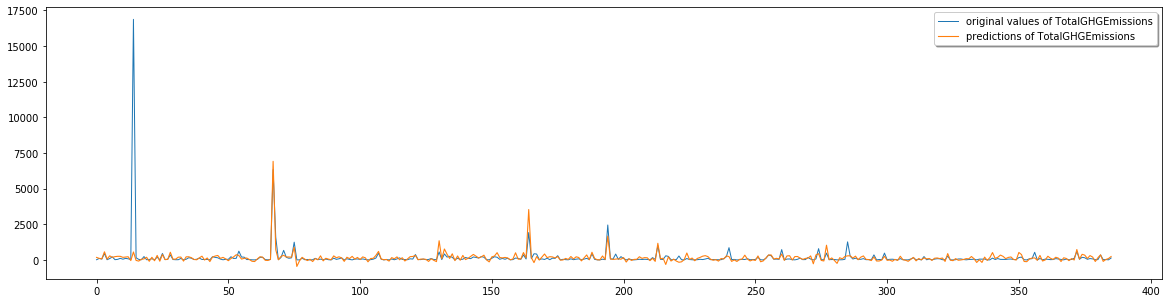

{'best_params': {'alpha': 0, 'l1_ratio': 0}, 'R2': 0.24053242642862518, 'rmse': 851.9325172262505, 'model': 'ElasticNet', 'time_elapsed': 0.2068455919797998}


,best_params,R2,rmse,model,time_elapsed
0,None,0.1728,851.9325,LinearRegression,0.0037
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.5355,847.0750,Ridge,7.3079
2,"{'alpha': 0.105, 'fit_intercept': True}",0.2721,851.5670,Lasso,0.0729
3,"{'alpha': 0, 'l1_ratio': 0}",0.2405,851.9325,ElasticNet,0.2068


In [61]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values
 
param_grid = [{"alpha": [0],#np.arange(0,2,1),  #coefficient qui multiplie le terme de pénalité
              "l1_ratio": [0],#np.arange(0, 1, 0.01)#L1 ratio si = 1 équivaut à un Lasso si 0 à un Ridge
}]

 
model = ElasticNet( random_state=random_state,normalize=False)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
print(result)
df_result_with_energy_star_score

Conclusion modèles linéaires: La régularisation Ridge avec le pramaètre alpha=1 reste le meilleur modèle, la prise en compte de ENERGYSTARScore comme variable explicative améliore les performance du modèle

## Partie 2 modèles non linéaires

### 1 <u>Random Forest</u>

#### 1-1 <u>Random Forest sans ENERGYSTARScore </u>

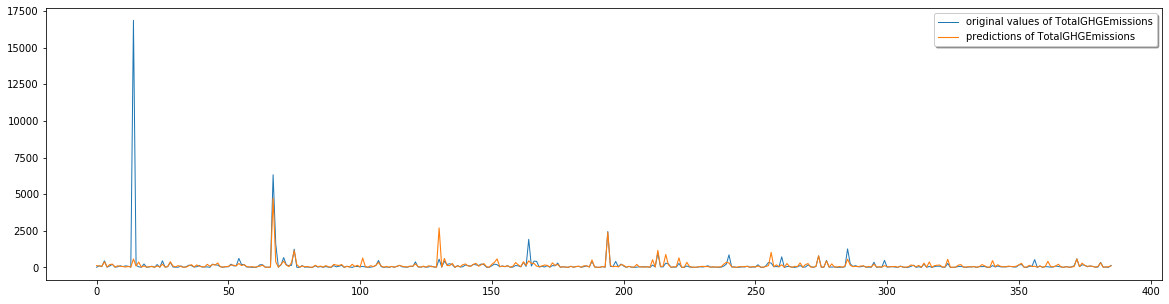

{'best_params': {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}, 'R2': 0.5119600801148358, 'rmse': 854.2913232445433, 'model': 'RandomForestRegressor', 'time_elapsed': 13.09225589002017}


,best_params,R2,rmse,model,time_elapsed
0,None,0.1728,851.9325,LinearRegression,0.0044
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.5355,847.0750,Ridge,7.4324
2,"{'alpha': 0.105, 'fit_intercept': True}",0.2721,851.5670,Lasso,0.0805
3,"{'alpha': 0, 'l1_ratio': 0}",0.2405,851.9325,ElasticNet,0.2054
4,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.5120,854.2913,RandomForestRegressor,13.0923


In [62]:

train_x=X_train.values
test_x=X_test.values
 


'''
param_grid = {
'n_estimators':[5,20,50,100], # nombre d'arbres
'max_features':['auto', 'sqrt'], # nombre de variables tenu en compte pour la création de chaque arbre
'max_depth':np.arange(10,130,10), # nombre maximum de niveaux dans chaque arbre de décision 
'min_samples_split':[2, 6, 10], # nombre minimal d'observation avant séparation du noeud
'min_samples_leaf':[1, 3, 4], #nombre minimal d'observation pour créer une feuille
'bootstrap':[True, False] # méthode d'échantillonnage
}   
'''
 
## best params
param_grid={'bootstrap': [True],
 'max_depth': [10],
 'max_features': ['auto'],
 'min_samples_leaf': [3],
 'min_samples_split': [2],
 'n_estimators': [100]
           }

model = RandomForestRegressor(random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
print(result)
df_result


#### 1-2 <u>Random Forest avec ENERGYSTARScore </u>

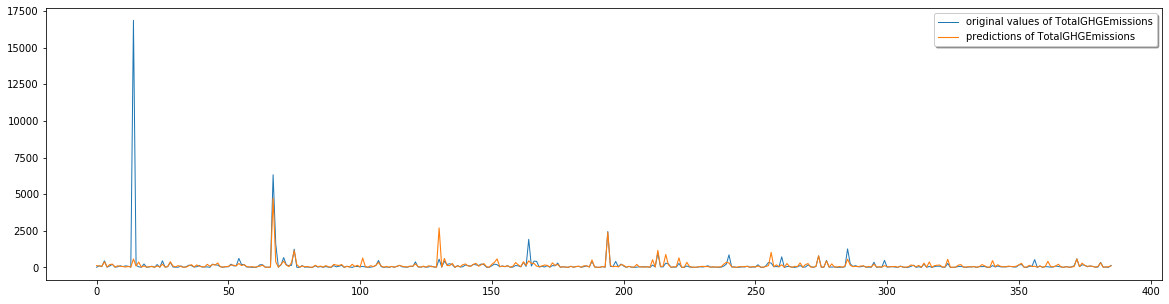

,best_params,R2,rmse,model,time_elapsed
0,None,0.1728,851.9325,LinearRegression,0.0037
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.5355,847.0750,Ridge,7.3079
2,"{'alpha': 0.105, 'fit_intercept': True}",0.2721,851.5670,Lasso,0.0729
3,"{'alpha': 0, 'l1_ratio': 0}",0.2405,851.9325,ElasticNet,0.2068
4,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.5120,854.2913,RandomForestRegressor,13.0107


In [63]:
 
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values
 

 


## best params
param_grid={'bootstrap': [True],
 'max_depth': [10],
 'max_features': ['auto'],
 'min_samples_leaf': [3],
 'min_samples_split': [2],
 'n_estimators': [100]
           }
model = RandomForestRegressor(random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
df_result_with_energy_star_score
 

  ### 2 <u>XGBoost</u>

#### 2-1 <u>XGBoost sans ENERGYSTARScore </u>

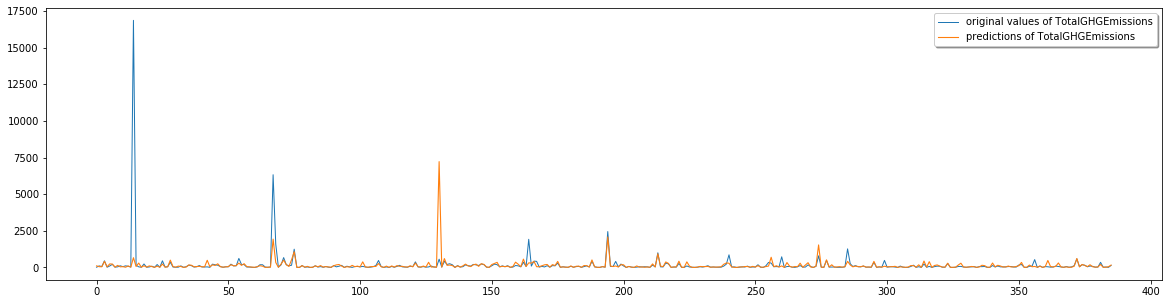

,best_params,R2,rmse,model,time_elapsed
0,None,0.1728,851.9325,LinearRegression,0.0044
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.5355,847.0750,Ridge,7.4324
2,"{'alpha': 0.105, 'fit_intercept': True}",0.2721,851.5670,Lasso,0.0805
3,"{'alpha': 0, 'l1_ratio': 0}",0.2405,851.9325,ElasticNet,0.2054
4,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.5120,854.2913,RandomForestRegressor,13.0923
5,"{'learning_rate': 0.1, 'max_depth': 25, 'n_est...",0.3027,932.7932,XGBRegressor,5.5039


In [64]:
 
train_x=X_train.values
test_x=X_test.values
 
'''
param_grid = {
    'learning_rate':np.arange(0.1,1,0.1),
    'n_estimators':  np.arange(50, 110, 10),  #nombre d'arbres de décision 50
              'max_depth': np.arange(20, 50, 5)} #nombre maximum de niveaux dans chaque arbre de décision 20
# define the model/ estimator
'''

param_grid={'learning_rate': [0.1], 'max_depth': [25], 'n_estimators': [50]}

model = XGBRegressor(random_state=42)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
df_result

#### 2-2 <u>XGBoost avec ENERGYSTARScore </u>

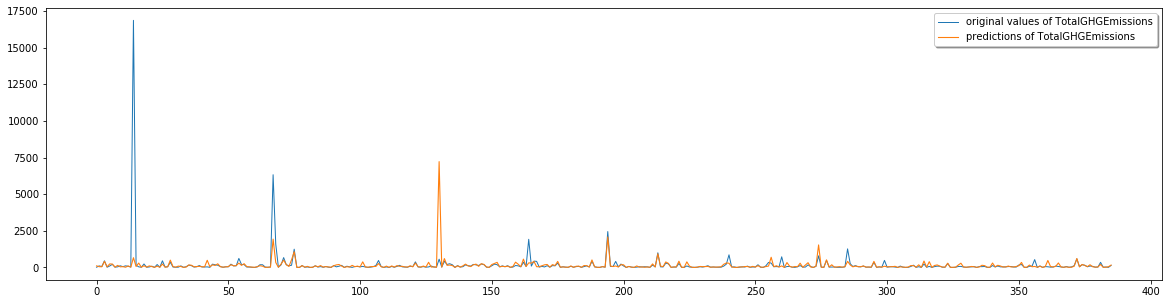

,best_params,R2,rmse,model,time_elapsed
0,None,0.1728,851.9325,LinearRegression,0.0037
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.5355,847.0750,Ridge,7.3079
2,"{'alpha': 0.105, 'fit_intercept': True}",0.2721,851.5670,Lasso,0.0729
3,"{'alpha': 0, 'l1_ratio': 0}",0.2405,851.9325,ElasticNet,0.2068
4,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.5120,854.2913,RandomForestRegressor,13.0107
5,"{'learning_rate': 0.1, 'max_depth': 25, 'n_est...",0.3027,932.7932,XGBRegressor,5.5066


In [65]:
 
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values

'''
param_grid = {
    'learning_rate':np.arange(0.1,1,0.1),
    'n_estimators':  np.arange(50, 110, 10),  #nombre d'arbres de décision 50
              'max_depth': np.arange(20, 50, 5)} #nombre maximum de niveaux dans chaque arbre de décision 20
# define the model/ estimator
'''

param_grid={'learning_rate': [0.1], 'max_depth': [25], 'n_estimators': [50]}


# define the model/ estimator
model = XGBRegressor(random_state=42)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
df_result_with_energy_star_score


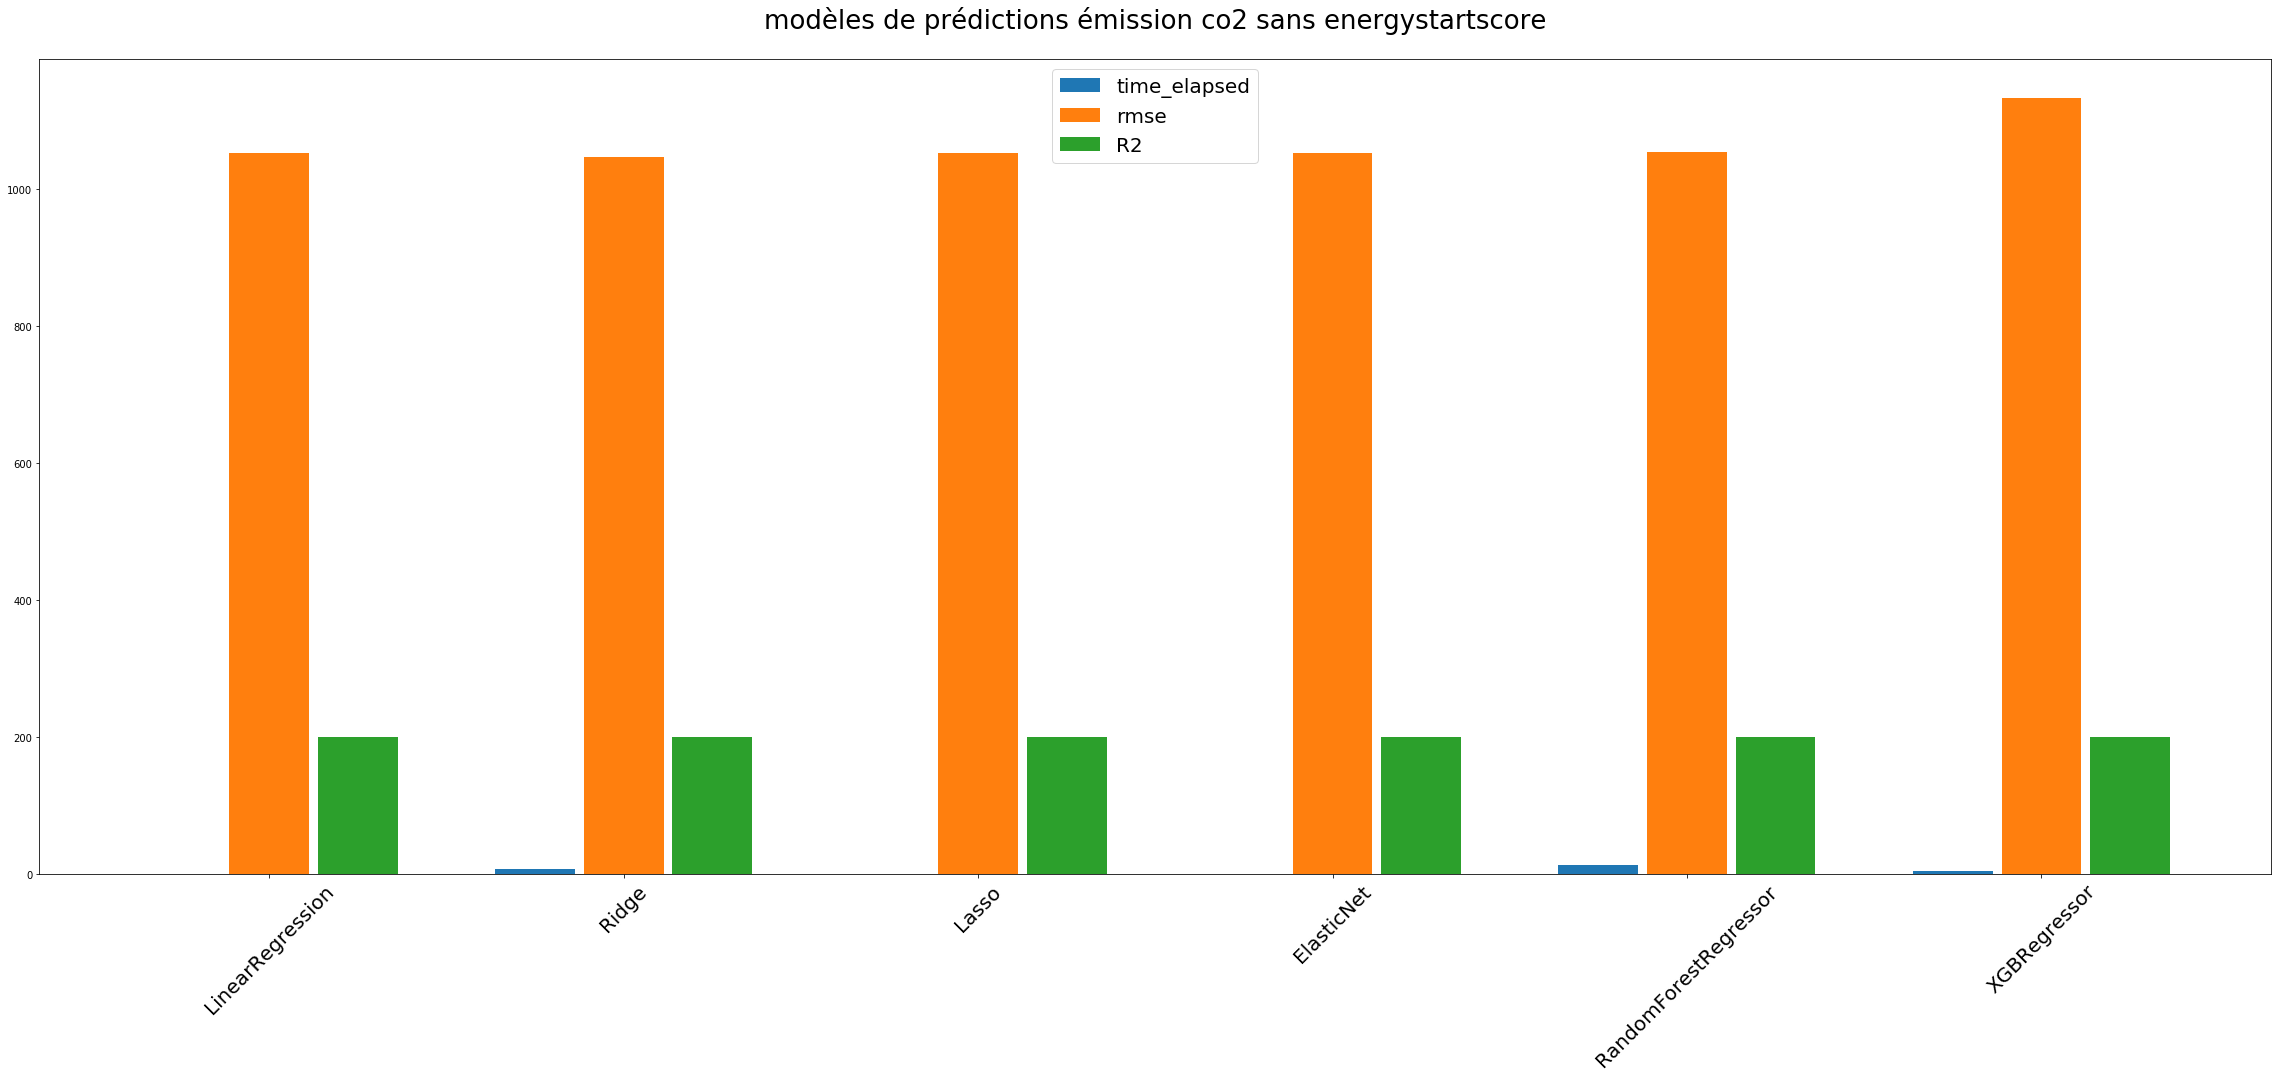

In [66]:
from sklearn.preprocessing import StandardScaler
Labels=df_result['model'].unique().tolist()
 
 
numeric_cols=['R2','rmse','time_elapsed']
fig, ax = plt.subplots(figsize=(40,15))
data_plot=df_result.copy()
data_plot['R2']=data_plot['R2']+200
data_plot['rmse']=data_plot['rmse']+200
 
utils.bar_plot(ax,data_plot[['time_elapsed','rmse','R2']], total_width=1.5, single_width=0.9)
plt.xticks(range(len(Labels)), Labels, fontsize=20, rotation=45)

ttl = plt.title("modèles de prédictions émission co2 sans energystartscore", fontsize=26)
ttl.set_position([.5, 1.03])
plt.show()

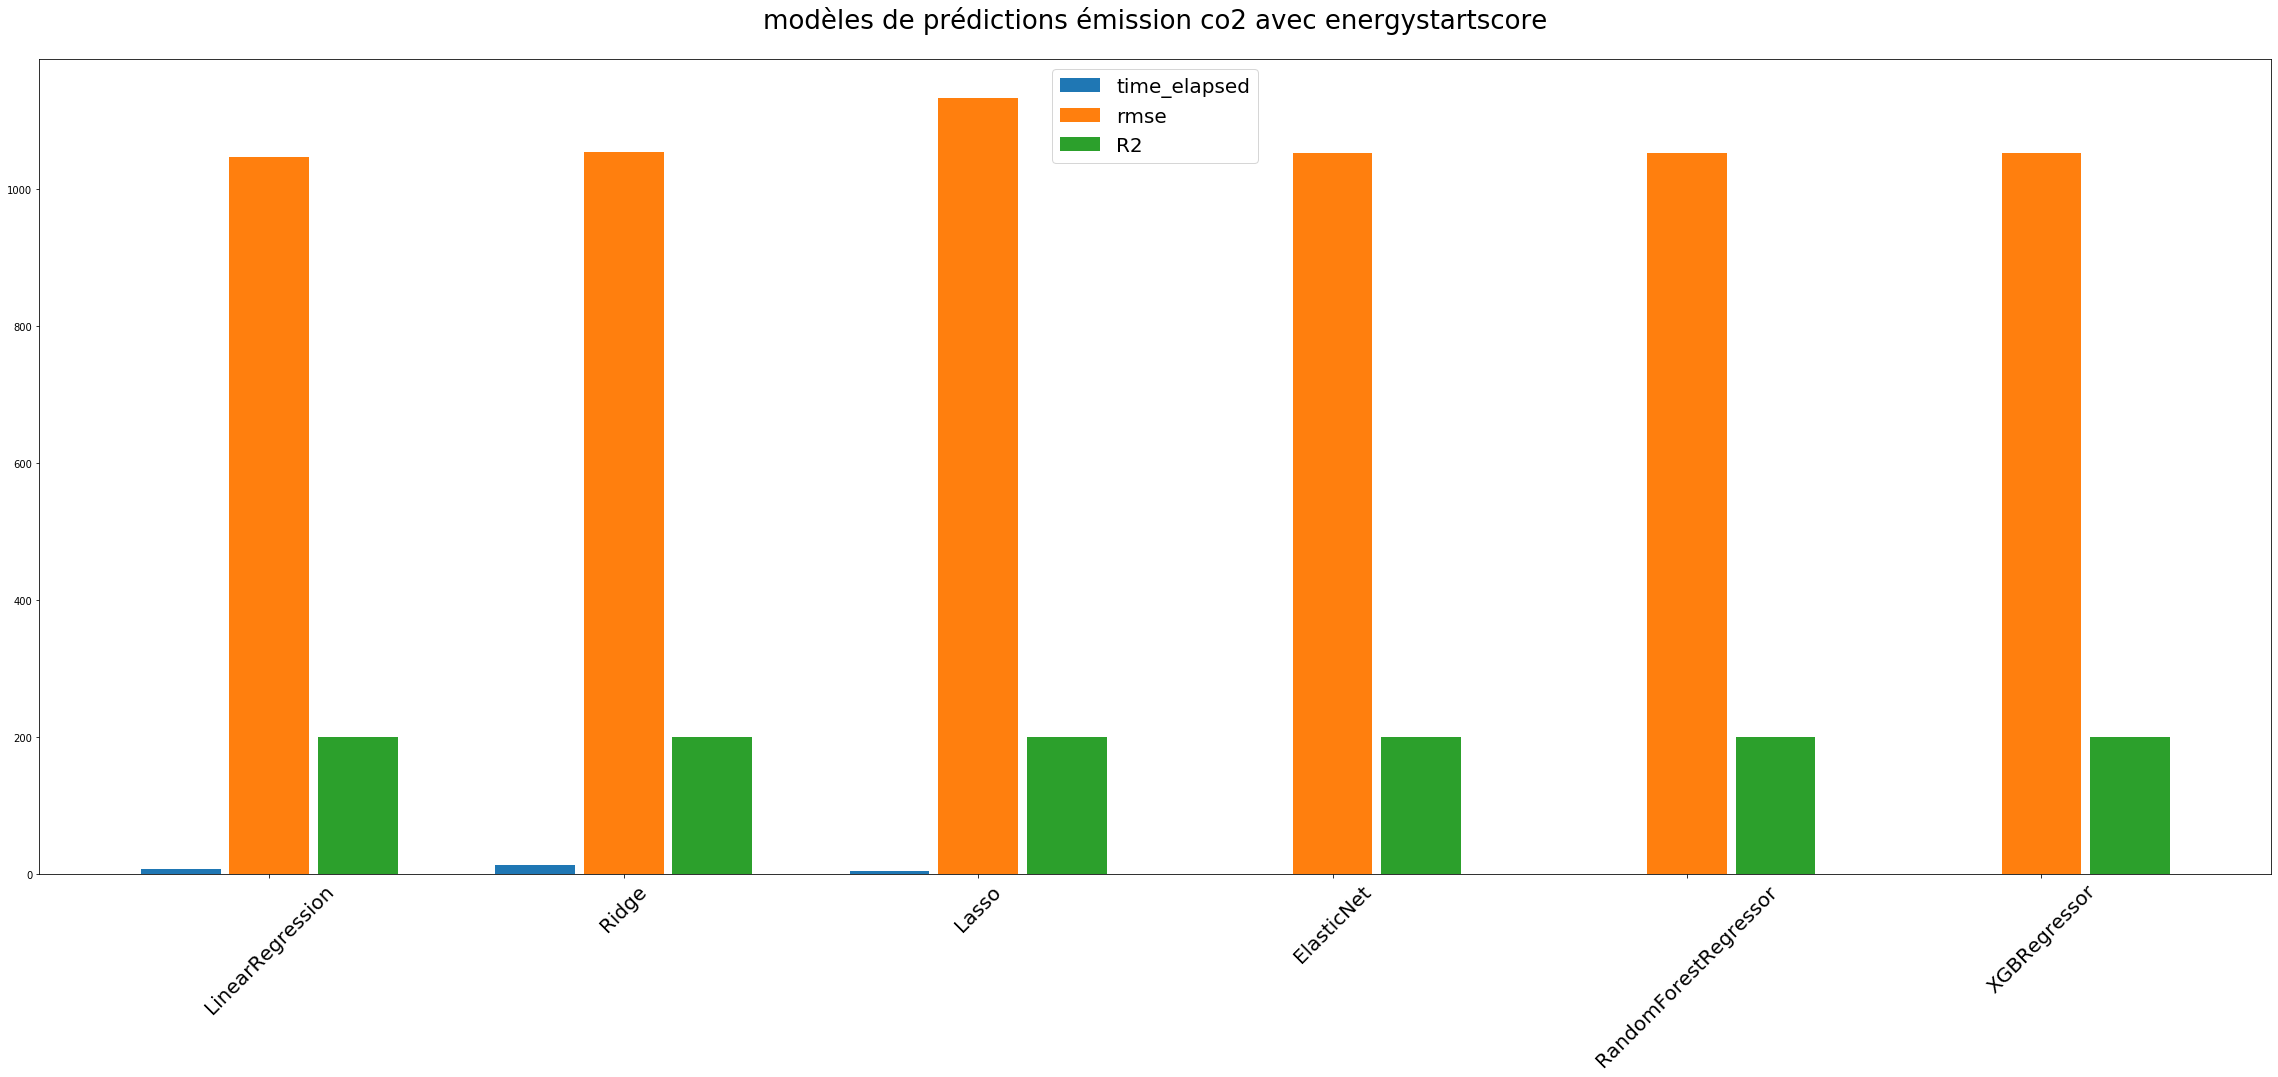

In [67]:
from sklearn.preprocessing import StandardScaler
Labels=df_result_with_energy_star_score['model'].unique().tolist()
 
 
numeric_cols=['R2','rmse','time_elapsed']
fig, ax = plt.subplots(figsize=(40,15))
data_plot=df_result_with_energy_star_score.copy()
data_plot['R2']=data_plot['R2']+200
data_plot['rmse']=data_plot['rmse']+200
 
utils.bar_plot(ax,data_plot[['time_elapsed','rmse','R2']].sort_values(ascending=False,by='R2'), total_width=1.5, single_width=0.9)
plt.xticks(range(len(Labels)), Labels, fontsize=20, rotation=45)

ttl = plt.title("modèles de prédictions émission co2 avec energystartscore", fontsize=26)
ttl.set_position([.5, 1.03])
plt.show()

In [68]:
df_result.sort_values(by='R2',ascending=False)

,best_params,R2,rmse,model,time_elapsed
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.5355,847.0750,Ridge,7.4324
4,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.5120,854.2913,RandomForestRegressor,13.0923
5,"{'learning_rate': 0.1, 'max_depth': 25, 'n_est...",0.3027,932.7932,XGBRegressor,5.5039
2,"{'alpha': 0.105, 'fit_intercept': True}",0.2721,851.5670,Lasso,0.0805
3,"{'alpha': 0, 'l1_ratio': 0}",0.2405,851.9325,ElasticNet,0.2054
0,None,0.1728,851.9325,LinearRegression,0.0044


In [69]:
df_result_with_energy_star_score.sort_values(by='R2',ascending=False)

,best_params,R2,rmse,model,time_elapsed
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",0.5355,847.0750,Ridge,7.3079
4,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.5120,854.2913,RandomForestRegressor,13.0107
5,"{'learning_rate': 0.1, 'max_depth': 25, 'n_est...",0.3027,932.7932,XGBRegressor,5.5066
2,"{'alpha': 0.105, 'fit_intercept': True}",0.2721,851.5670,Lasso,0.0729
3,"{'alpha': 0, 'l1_ratio': 0}",0.2405,851.9325,ElasticNet,0.2068
0,None,0.1728,851.9325,LinearRegression,0.0037
